In [ ]:
import pandas as pd
import os
import pandas as pd
import requests
import sys
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.metrics import mean_squared_error
from math import sqrt
# import dates as date

begindate = '20190917' # data is avail. beginning 20180917
enddate = '20190927'

# comid_stn = pd.read_csv('D:/Sujana/Project/csv/comid_stationname.csv')
comid_stn = pd.read_csv('comid_stationname.csv')
comid_all = comid_stn['COMID']
index = comid_stn['Index']
gauge_name_all = comid_stn['station']
rmse_df=pd.DataFrame()
# for i in index:
#     comid = comid_all[i]
#     gauge_name = gauge_name_all[i]
# # comid = 1479611
# # gauge_name = 'JAIT2'
#     nwm_discharge = pd.read_csv('D:/Sujana/Project/all_in_one/NWM_discharge_with_stage/short_range/'+str(comid)+'_with_stage.csv')
#     dd6_data = pd.read_csv('D:/Sujana/Project/all_in_one/DD6_stage_with_discharge/'+gauge_name+' with_discharge.csv')
#     nwm_discharge['Time']=pd.to_datetime(nwm_discharge['Time'],utc=True)
#     dd6_data['timestamp']=pd.to_datetime(dd6_data['timestamp'],utc=True)
#     # nwm_discharge = nwm_discharge.set_index('Time') 
#     dd6_data = dd6_data.set_index('timestamp')
#     nwm_discharge = nwm_discharge.set_index('Time') 





In [ ]:
def get_location(ref_data,req_data):
    # Inputs:
    # ref_data: "dataframe" from which we need to extact the matching index
    # req_data: "datetime" for which the index close to ref_data's datetime is required
    # Output
    # Int if unique, and slice if monotonic
    index = ref_data.index.get_loc(req_data,method='nearest')
    return index

In [ ]:
for i in index:
    comid = comid_all[i]
    gauge_name = gauge_name_all[i]
    nwm_discharge = pd.read_csv('D:/Sujana/Project/all_in_one/NWM_discharge_with_stage/short_range/'+str(comid)+'_with_stage.csv')
    dd6_data = pd.read_csv('D:/Sujana/Project/all_in_one/DD6_stage_with_discharge/'+gauge_name+' with_discharge.csv')
    nwm_discharge['Time']=pd.to_datetime(nwm_discharge['Time'],utc=True)
    dd6_data['timestamp']=pd.to_datetime(dd6_data['timestamp'],utc=True)
    # nwm_discharge = nwm_discharge.set_index('Time') 
    dd6_data = dd6_data.set_index('timestamp')
    nwm_discharge = nwm_discharge.set_index('Time') 

    # getting the list of indexes in nwm data that is closet to each dd6_data
    indx_list = [get_location(nwm_discharge,x) for x in dd6_data.index]
#   assigning the filtered indexes to the nwm_discharge
    nwm_discharge_filtered = nwm_discharge.iloc[indx_list]

# Creating new dataframe for error calculation
    new_df = pd.DataFrame()
    new_df['Date'] = dd6_data.index
    column1 = dd6_data.reset_index()['dd6_stage_m']
    column2 = nwm_discharge_filtered.reset_index()['interp_nwm_stage']
    new_df['Observed - Model'] = (column1-column2)
    new_df.set_index('Date')

  #     Calculating the root mean squared error  
    rmse_df['comid'] = rmse_df(comid)
    rmse_df['gauge name'] = gauge_name
    rmse_df['rmse'] = sqrt(mean_squared_error(column1, column2))
#     rmse.append(rms)


    



    # Plotting the error

    plt.figure(facecolor='white')
    plt.rc('font', size=14)
    fig, ax = plt.subplots(figsize=(10, 6))
    # time = discharge_difference['Time']
            # print (time)
    ax.plot(new_df['Date'], new_df['Observed - Model'],color='tab:blue', label='Observed-Model')
    
    ax.set(xlabel='Date',
            ylabel='Error [meters]',
            title=f'COMID {comid} {gauge_name} from ' \
            f'{pd.to_datetime(begindate).strftime("%b %d %Y")} to ' \
            f'{pd.to_datetime(enddate).strftime("%b %d %Y")} for short range')
    date_form = DateFormatter("%b %d")
    ax.xaxis.set_major_formatter(date_form)
    # ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    # ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=1, tz=None)
    ax.legend()
    ax.grid(True)
    plt.savefig('D:/Sujana/Project/all_in_one/error/plot/'+str (comid)+' Station '+gauge_name+'_Stage_graph_shortrange.jpg')

In [ ]:
def get_location(ref_data,req_data):
    # Inputs:
    # ref_data: "dataframe" from which we need to extact the matching index
    # req_data: "datetime" for which the index close to ref_data's datetime is required
    # Output
    # Int if unique, and slice if monotonic
    index = ref_data.index.get_loc(req_data,method='nearest')
    return index

In [ ]:
# getting the list of indexes in nwm data that is closet to each dd6_data
indx_list = [get_location(nwm_discharge,x) for x in dd6_data.index]
# assigning the filtered indexes to the nwm_discharge
nwm_discharge_filtered = nwm_discharge.iloc[indx_list]

In [ ]:
# difference dataframe
new_df = pd.DataFrame()
new_df['Date'] = dd6_data.index
column1 = dd6_data.reset_index()['dd6_stage_m']
column2 = nwm_discharge_filtered.reset_index()['interp_nwm_stage']
new_df['Observed - Model'] = column1-column2
new_df
new_df.set_index('Date')

In [ ]:
# Plotting error-time series
plt.figure(facecolor='white')
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(10, 6))
  # time = discharge_difference['Time']
          # print (time)
ax.plot(new_df['Date'], new_df['Observed - Model'],color='tab:blue', label='Observed-Model')
  
ax.set(xlabel='Date',
        ylabel='Error [meters]',
        title=f'COMID {comid} {gauge_name} from ' \
        f'{pd.to_datetime(begindate).strftime("%b %d %Y")} to ' \
        f'{pd.to_datetime(enddate).strftime("%b %d %Y")} for short range')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
  # ax.xaxis.set_major_locator(mdates.WeekdayLocator())
  # ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=1, tz=None)
ax.legend()
ax.grid(True)
plt.savefig('D:/Sujana/Project/all_in_one/error/plot/'+str (comid)+' Station '+gauge_name+'_Stage_graph_AnalysisAssim.jpg')

In [ ]:
from sklearn.metrics import mean_squared_error
mean = mean_squared_error(column1,column2)

In [ ]:
new_df['nwm_time'] = pd.to_datetime(nwm_discharge_filtered.index)

new_df['time_difference']=new_df['Date']-new_df['nwm_time']


In [ ]:
new_df['nwm_time'] = nwm_discharge_filtered.index
new_df['nwm_time'] = new_df['nwm_time']


# type(new_df['nwm_time'])

In [ ]:
date_1 = new_df['nwm_time']

In [ ]:
from datetime import datetime
date_1 = new_df['nwm_time']
date_2 = new_df['Date']
date_format_str = '%d/%m/%Y %H:%M:%S.%f'
end =   datetime.strptime(date_2, date_format_str)
start = datetime.strptime(date_1, date_format_str)

# Get interval between two timstamps as timedelta object
diff = end - start
# Get interval between two timstamps in hours
diff_in_hours = diff.total_seconds() / 3600
print('Difference between two datetimes in hours:')
print(diff_in_hours)

In [ ]:
new_df['date_dd6']=dd6_data.index

In [ ]:
dd6_data.reset_index()['dd6_stage_m']
dd6_data.index
dd6_data.iloc[:,:]
dd6_data.head(10)
nwm_discharge_filtered.head(10)

In [ ]:
dd6_data[['dd6_stage_m']]

In [ ]:
dd6_data.head(10)

In [ ]:
num_discharge_filtered.head(10)

In [ ]:
# getting the list of indexes in nwm data that is closet to each dd6_data
indx_list = [get_location(nwm_discharge,x) for x in dd6_data.index]
# assigning the filtered indexes to the nwm_discharge
num_discharge_filtered = nwm_discharge.iloc[indx_list]
num_discharge_filtered.to_csv(r'D:/Sujana/Project/all_in_one/error/'+str(comid)+'_'+gauge_name+'.csv')
num_discharge_combined = pd.read_csv('D:/Sujana/Project/all_in_one/error/'+str(comid)+'_'+gauge_name+'.csv')
num_discharge_combined['dd6_stage_m']=dd6_data['dd6_stage_m']
num_discharge_combined['interp_dd6_discharge'] = dd6_data['interp_dd6_discharge']


In [ ]:
b['new'] = dd6_data['value']
b.head(10)




#### Rough 

In [ ]:
c = get_location(nwm_discharge,dd6_data.index[10])
print(c)
print(nwm_discharge.iloc[c])

In [ ]:
# nwm_discharge['Time'].head()
dd6_data.index

In [ ]:
# dd6_data.index.get_loc(nwm_discharge['Time'], method='nearest')

dd6_data.index.get_loc(nwm_discharge['Time'], method='nearest')

In [ ]:
df

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
m = np.sqrt(1/2)
n = np.sqrt(2)
b = np.matrix([[1,0,0,0,0,m], [0,1,0,0,0,m], [0,0,1,0,0,m], [0,0,0,1,0,m], [0,0,0,0,1,m],[0,0,0,0,1,-1],[0,0,0,0,0,0],[0,0,0,0,0,0]])
f = np.matrix([[0],[100],[100],[0],[-100*n],[0],[0],[0]])
force = np.dot(np.linalg.pinv(b),f)
print(force)

[[ 58.57864376]
 [158.57864376]
 [158.57864376]
 [ 58.57864376]
 [-82.84271247]
 [-82.84271247]]


In [ ]:
np.matrix(b)

In [26]:
np.matrix([[0],[100],[100],[0],[-100*n],[0],[0],[0]])

matrix([[   0.        ],
        [ 100.        ],
        [ 100.        ],
        [   0.        ],
        [-141.42135624],
        [   0.        ],
        [   0.        ],
        [   0.        ]])

In [23]:
np.matrix([[1,0,0,0,0,m], [0,1,0,0,0,m], [0,0,1,0,0,m], [0,0,0,1,0,m], [0,0,0,0,1,m],[0,0,0,0,1,-1],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])

matrix([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.70710678],
        [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
          0.70710678],
        [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
          0.70710678],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.70710678],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.70710678],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         -1.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]])

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
image = scipy.io.loadmat('radar.mat')
image = image['A']
U,svd,V = np.linalg.svd(image)
# print(svd)
# plt.figure(facecolor='white')
# plt.title('Singular Value Decomposition')
# plt.plot(svd)
# plt.savefig('D:/Sujana/CE397/hw7_8/qs8_6_2.jpg')

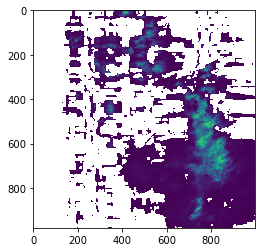

In [37]:
k = [10,50,500]

for i in k:
    U,svd,V = np.linalg.svd(image)
    NewImage = U[:,:i] @ np.diag(svd[:i]) @V[:i,:]
    NewImage[NewImage<0.01]=np.nan
    plt.imshow(NewImage)
    plt.savefig('NewLowRankImage_'+str(i)+'.jpg')

In [32]:
np.diag(svd)

array([[4.27523851e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.78307854e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.36029913e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.54376216e-14, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.54376216e-14, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.54376216e-14]])

In [33]:
svd

array([4.27523851e+02, 1.78307854e+02, 1.36029913e+02, 1.16430865e+02,
       1.08798808e+02, 7.75675146e+01, 6.85171015e+01, 6.78172937e+01,
       6.55672750e+01, 5.56060744e+01, 5.30105654e+01, 4.84906440e+01,
       4.30886187e+01, 4.03972303e+01, 3.79981061e+01, 3.63721492e+01,
       3.49807918e+01, 3.36319333e+01, 3.28220853e+01, 3.10014657e+01,
       3.04119248e+01, 2.91612770e+01, 2.73945675e+01, 2.61421727e+01,
       2.57386697e+01, 2.51800907e+01, 2.42880439e+01, 2.33160747e+01,
       2.25974809e+01, 2.21547139e+01, 2.11600423e+01, 2.03015638e+01,
       1.98905782e+01, 1.95162575e+01, 1.91679715e+01, 1.76736391e+01,
       1.74727886e+01, 1.72673833e+01, 1.67414930e+01, 1.61858175e+01,
       1.56000998e+01, 1.52821893e+01, 1.50128750e+01, 1.44914857e+01,
       1.43526015e+01, 1.40666500e+01, 1.37084200e+01, 1.36842735e+01,
       1.33319520e+01, 1.27921308e+01, 1.25922612e+01, 1.25351318e+01,
       1.23604451e+01, 1.19828570e+01, 1.17653311e+01, 1.15665044e+01,
      